In [1]:
# https://www.tensorflow.org/tutorials/generative/autoencoder?hl=ko
# 이 튜토리얼에서는 3가지 예(기본 사항, 이미지 노이즈 제거 및 이상 감지)를 통해
# autoencoder를 소개합니다.

# autoencoder는 입력을 출력에 복사하도록 훈련된 특수한 유형의 신경망입니다.
# 예를 들어, 손으로 쓴 숫자의 이미지가 주어지면 autoencoder는 먼저 이미지를
# 더 낮은 차원의 잠재 표현으로 인코딩한 다음 잠재 표현을 다시 이미지로 디코딩합니다. 
# autoencoder는 재구성 오류를 최소화하면서 데이터를 압축하는 방법을 학습합니다.

# autoencoder에 대해 자세히 알아보려면 Ian Goodfellow, Yoshua Bengio 및 
# Aaron Courville의 딥 러닝에서 14장을 읽어보세요.

In [2]:
## TensorFlow 및 기타 라이브러리 가져오기
from ast import BitAnd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

#import autokeras as ak

In [3]:
# 데이터세트 로드하기
# y_train과 t_test는 할당하지 않는다.

# (x_train, _), (x_test, _) = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
# Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).
# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
# y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.
# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.
# y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

In [4]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [5]:
print("type(fashion_mnist.load_data() = ", type(fashion_mnist.load_data()))        # <class 'tuple'>
print("len(fashion_mnist.load_data()) = ", len(fashion_mnist.load_data()))         # 2

type(fashion_mnist.load_data() =  <class 'tuple'>
len(fashion_mnist.load_data()) =  2


In [6]:
print("type(fashion_mnist.load_data()[0]) = ", type(fashion_mnist.load_data()[0]))     # <class 'tuple'>
print("len(fashion_mnist.load_data()[0]) = ", len(fashion_mnist.load_data()[0]))      # 2
print("type(fashion_mnist.load_data()[1]) = ", type(fashion_mnist.load_data()[1]))     # <class 'tuple'>
print("len(fashion_mnist.load_data()[1]) = ", len(fashion_mnist.load_data()[1]))      # 2

type(fashion_mnist.load_data()[0]) =  <class 'tuple'>
len(fashion_mnist.load_data()[0]) =  2
type(fashion_mnist.load_data()[1]) =  <class 'tuple'>
len(fashion_mnist.load_data()[1]) =  2


In [7]:
print("x_train type(fashion_mnist.load_data()[0][0]) = ", type(fashion_mnist.load_data()[0][0]))  # <class 'numpy.ndarray'>
print("x_train fashion_mnist.load_data()[0][0].shape = ", fashion_mnist.load_data()[0][0].shape)  # (60000, 28, 28)
print("y_train type(fashion_mnist.load_data()[0][1]) = ", type(fashion_mnist.load_data()[0][1]))  # <class 'numpy.ndarray'>
print("y_train fashion_mnist.load_data()[0][1].shape = ", fashion_mnist.load_data()[0][1].shape)  # (60000,)

x_train type(fashion_mnist.load_data()[0][0]) =  <class 'numpy.ndarray'>
x_train fashion_mnist.load_data()[0][0].shape =  (60000, 28, 28)
y_train type(fashion_mnist.load_data()[0][1]) =  <class 'numpy.ndarray'>
y_train fashion_mnist.load_data()[0][1].shape =  (60000,)


In [8]:
print("x_test type(fashion_mnist.load_data()[1][0]) = ", type(fashion_mnist.load_data()[1][0]))  # <class 'numpy.ndarray'>
print("x_test fashion_mnist.load_data()[1][0].shape = ", fashion_mnist.load_data()[1][0].shape)  # (10000, 28, 28)
print("y_test type(fashion_mnist.load_data()[1][1]) = ", type(fashion_mnist.load_data()[1][1]))  # <class 'numpy.ndarray'>
print("y_test fashion_mnist.load_data()[1][1].shape = ", fashion_mnist.load_data()[1][1].shape)  # (10000,)

x_test type(fashion_mnist.load_data()[1][0]) =  <class 'numpy.ndarray'>
x_test fashion_mnist.load_data()[1][0].shape =  (10000, 28, 28)
y_test type(fashion_mnist.load_data()[1][1]) =  <class 'numpy.ndarray'>
y_test fashion_mnist.load_data()[1][1].shape =  (10000,)


In [9]:
# 훈련용 이미지 6만개, 테스트용 이미지 1만개, 총 7만개

In [10]:
# array 출력 생략 해제
np.set_printoptions(threshold=np.inf, linewidth=np.inf) #inf = infinity

# array 출력 생략 복원
# np.set_printoptions(threshold=1000, linewidth=75)

In [11]:
# 좀 더 자세히 살펴보기 위해서 x_train에 첫 번째 이미지 데이터를 출력했습니다.  (스크롤 주의)
print(x_train[0])
print(x_train[0].shape) # (28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [12]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ksg97031&logNo=221302568510
# 위에서 말씀한 거처럼 28 * 28 배열로 원소들이 저장되어 있고 255를 넘는 값이 없습니다.
# 이는 각각에 원소가 데이터에 기본단위인 Byte(8 bit)로 표현됐기 때문에 0~255 사이에 값으로만 표현됩니다.
# 1 bit = 0, 1 => 2가지 값을 가질 수 있다.
# 2 bit = 00, 01, 10, 11 => 2^2=4가지 값을 가질 수 있다.
# 8 bit = 00 00 00 00 ~ 11 11 11 11 => 2^8=256가지 값을 가질 수 있다.
# Byte = 주소지정이 가능한 단일 저장소(데이터 파일의 크기)

# (이미지든, 동영상 파일이든 데이터로 된 모든 파일은 기본 단위인 Byte로 표현됩니다. )
# 0~255 중 최대 범위인 255는 우리가 표준으로 사용하는 10진수이며 
# 다른 진수 표현으론 16 진수 = 0xff, 8 진수 = 377입니다.

# 2진수(0 과 1) = binary or Bit
# 컴퓨터는 8개단위의 비트(8bit)를 하나의 그룹으로 사용하는데 이를 바이트(Byte)라 한다.
# (8bit=1Byte)

# 1Byte = 8bit = 2^8 = 256 = 0~255
# Byte는 주소 지정이 가능한 단일 저장소이다.(데이터 파일의 크기)

In [13]:
# 타입을 바꾸는(astype) 함수를 통해 실수화(float) 된 후 255로 나누어지는(/) 코드가 있습니다.
# astype('float32') 코드를 통해 실수화해줍니다.
# 실수 화가 되면 정수 뒤에 "정수. 0"처럼 '.0'이 붙거나 "정수. "처럼 생략됩니다
# 0~255 값을 0~1사이로 변경해주는 것입니다.(float32로 정규화)
#  https://hdongle.tistory.com/47
#  사이즈는 더 커짐
#  딥러닝에 넣을 때, 정규화해서 넣어야 더 잘된다고 함
#  0~255면 값이 너무 커서 학습이 잘 이뤄지지 않는다고 함
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train[0])

print (x_train.shape) # (60000, 28, 28)
print (x_test.shape)  # (10000, 28, 28)

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [14]:
# 첫 번째 예: 기본 autoencoder
# 두 개의 Dense 레이어로 autoencoder를 정의합니다.
# 이미지를 64차원 잠재 벡터로 압축하는 encoder와 
# 잠재 공간에서 원본 이미지를 재구성하는 decoder입니다.
# latent: 잠재, Dimension: 크기, 차원
latent_dim = 64 

In [15]:
# Keras
# https://www.tensorflow.org/guide/keras/sequential_model?hl=ko


# 클래스를 계산기로 보면 계산기가 여려대 필요할때 계산기를 여려개 만들지 않고
# 계산기 클래스로 만든 객체를 여려개 만들어 사용하면 독립적으로 사용할 수 있다.
# 클래스로 만든 객체를 해당 클래스의 인스턴스라고 한다.
# 클래스를 상속하여 만들기위해서는 class 클래스 이름(상속할 클래스 이름)
# 아래 Class Autoencoder은 Model Class(tf.keras.Model)를 상속받아 만든 클래스 이다.

In [16]:
class Autoencoder(Model):
  # 클래스로 객체 a를 만들고 객체a 가 메서드를 호출하면 메서드의 첫 번째 매개변수 
  # self에는 메서드를 호출한 객체a가 자동으로 전달된다.

  # class안에 생성된 함수를 method(메서드)라고 한다.
  # method 중에 __init__ method를 constructor(생성자)라고 한다.
  # 객체에 초깃값을 설정할 필요가 있을때는 생성자__init__를 사용하여 메서드를 만든다.
  # 생성자 __init__ 는 객체가 생성되는 시점에 자동으로 호출된다.
  def __init__(self, encoding_dim):
    print("__init__ called")
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    # 케라스는 Sequential을 사용하여 층을 차례대로 쌓습니다.  tf.keras.Sequential
    self.encoder = tf.keras.Sequential([
      # Flatten: 납작해지다
      # tf.keras.layers.Flatten은 입력을 1차원으로 변환합니다., Batch의 크기에는 영향을 주지 않습니다.
      # 입력의 형태가 (None, 28, 28)일 때, (None, 784)로 변환됩니다.
      layers.Flatten(),
      
      # Dense: 밀집한
      # tf.keras.layers.Dense는 일반적인 완전 연결된 (densely-connected, fully-connected) 신경망 층입니다.

      # <활성화 함수>
      # 이에 대한 해결책이 바로 활성화 함수(activation function)이다. 
      # 활성화 함수를 사용하면 입력값에 대한 출력값이 linear하게 나오지 않으므로
      # 선형분류기를 비선형 시스템으로 만들 수 있다.
      # * 따라서 MLP(Multiple layer perceptron)는 단지 linear layer를 여러개 쌓는 개념이 아닌 
      # 활성화 함수를 이용한 non-linear 시스템을 여러 layer로 쌓는 개념이다.
      # relu 함수는 x가 양수면 자기 자신을 반환하고, 음수면 0을 반환한다.
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  # __call__은 인스턴스가 호출되었을 때 실행 되는 것이다.
  # tf.keras.Model.call => Calls the model on new inputs and returns the outputs as tensors.
  # call(inputs, training=None, mask=None)
  def call(self, x):
    print("\n call method called")
    encoded = self.encoder(x)
    print("self.encoder(x) called")
    decoded = self.decoder(encoded)
    print("self.decoder(encoded) called")
    return decoded

In [17]:
# autoencoder는 object(객체)이다.
# autoencoder object는 Autoencoder Class의 instance 이다.
print("before autoencoder obejec creation")
autoencoder = Autoencoder(latent_dim)
print("after autoencoder obejec creation")

before autoencoder obejec creation
__init__ called
after autoencoder obejec creation


In [18]:
# cost function: 비용함수, 목적함수, 손실함수: 예측값과 식제값의 차이: MSE
# Optimizer: 옵티마이저: 비용함수를 최소화 하는 매개변수인 W와 b를 찾기위해 사용되는 알고리즘:
#            옵티마이저를 통해 적절한 W와 b를 찾아내는 과정을 머신러닝에서 학습(training)이라고 한다.
#            경사하강법(Gradient Descent): W(x축)의 변화에 따른 Cost(y축)을 줄이기 위함
# tf.keras.Model.compile => Configures the model for training.

print("\n before autoencoder.compile()")
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
print("\n after autoencoder.compile()")


 before autoencoder.compile()

 after autoencoder.compile()


In [19]:
# x_train을 입력과 대상으로 사용하여 모델을 훈련합니다. 
# encoder는 데이터세트를 784차원에서 잠재 공간으로 압축하는 방법을 배우고,
# decoder는 원본 이미지를 재구성하는 방법을 배웁니다.

history = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10

 call method called
self.encoder(x) called
self.decoder(encoded) called

 call method called
self.encoder(x) called
self.decoder(encoded) called
1844/1875 [============================>.] - ETA: 0s - loss: 0.0242
 call method called
self.encoder(x) called
self.decoder(encoded) called
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0240 - val_loss: 0.0140
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0091 - val_loss: 0.0092


In [20]:
# CPU 학습
# print("CPU를 사용한 학습")
# with tf.device("/device:CPU:0"):
#   autoencoder.fit(x_train, x_train,
#                   epochs=10,
#                   shuffle=True,
#                   validation_data=(x_test, x_test))

In [21]:
# print("GPU를 사용한 학습")
# with tf.device("/device:GPU:0"):
#   autoencoder.fit(x_train, x_train,
#                   epochs=10,
#                   shuffle=True,
#                   validation_data=(x_test, x_test))

In [22]:
# pip install numba 
# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

In [23]:
# encoder의 요약을 살펴보겠습니다. 
# 이미지가 28x28에서 7x7로 어떻게 다운샘플링되는지 확인하세요.
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [24]:
# decoder는 이미지를 7x7에서 28x28로 다시 업샘플링합니다.
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델이 훈련되었으므로 테스트 세트에서 이미지를 인코딩 및 디코딩하여 테스트해 보겠습니다.
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

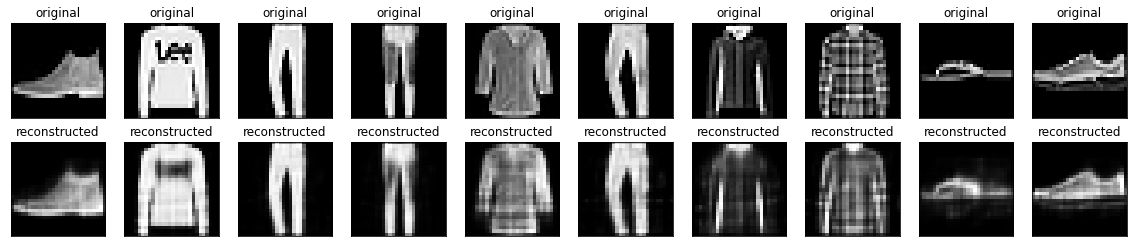

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

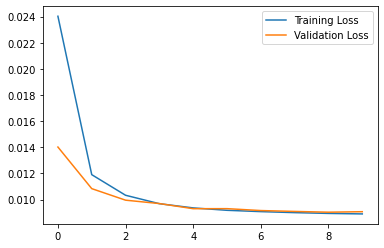

In [27]:
# plot history
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [29]:
import tensorflow.keras as keras

In [30]:
# save and load a mode
autoencoder.save('./model/')
autoencoder = keras.models.load_model('./model/')


 call method called
self.encoder(x) called
self.decoder(encoded) called

 call method called
self.encoder(x) called
self.decoder(encoded) called

 call method called
self.encoder(x) called
self.decoder(encoded) called

 call method called
self.encoder(x) called
self.decoder(encoded) called

 call method called
self.encoder(x) called
self.decoder(encoded) called

 call method called
self.encoder(x) called
self.decoder(encoded) called

 call method called
self.encoder(x) called
self.decoder(encoded) called
INFO:tensorflow:Assets written to: ./model/assets


In [31]:
# load autoencoder model
if autoencoder is None:
    autoencoder = Autoencoder(latent_dim=64 * 2)
    autoencoder = keras.models.load_model('./model/')

In [32]:
'''
4. Set threshold
'''


def model_threshold(autoencoder, x_train):
    encoded_imgs = autoencoder.encoder(x_train).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    loss = tf.keras.losses.mse(decoded_imgs, x_train)
    threshold = np.mean(loss) + np.std(loss)
    return threshold

In [33]:
'''
4. Set threshold
'''
threshold = model_threshold(autoencoder, x_train)
# loss = tf.keras.losses.mse(decoded_imgs, x_train)
# threshold = np.mean(loss) + np.std(loss)
print("Loss Threshold: ", threshold)

# load autoencoder model
if autoencoder is None:
    autoencoder = keras.models.load_model('./model/')

Loss Threshold:  0.019822735


In [34]:
import cv2
import pathlib

In [35]:
'''
5. Make an inference
'''


def spectrogram_loss(autoencoder, spectrogram, size=224):
    data = np.ndarray(shape=(1, size, size), dtype=np.float32)
    # individual sample
    # Load an image from a file
    data = cv2.imread(str(spectrogram), 0)
    # resize to make sure data consistency
    resized_data = cv2.resize(data, (size, size))
    # nomalize img
    normalized_data = resized_data.astype('float32') / 255.
    # test an image
    encoded = autoencoder.encoder(normalized_data.reshape(-1, size, size))
    decoded = autoencoder.decoder(encoded)
    loss = tf.keras.losses.mse(decoded, normalized_data)
    sample_loss = np.mean(loss) + np.std(loss)
    return sample_loss

In [ ]:
'''
5. Make an inference
'''
# get statistics for each spectrogram
#file = 'C:/workspace/autoencoder/autoencoder/data/sample_0.jpg'
#file = 'C:/workspace/autoencoder/autoencoder/data/sample_1.jpg'
#file = 'C:/workspace/autoencoder/autoencoder/data/sample_2.jpg'
file = 'C:/workspace/autoencoder/autoencoder/data/x_test/engine1_good/pure_101.jpg'
file = 'C:/workspace/autoencoder/autoencoder/data/x_test/engine2_broken/pure_0.jpg'
sample = plt.imread(file)
plt.imshow(sample)
sample = pathlib.Path(file)
sample_loss = spectrogram_loss(autoencoder, sample)

if sample_loss > threshold:
    print(
        f'Loss is bigger than threshold \n \
            Sample Loss: {sample_loss} \n \
            Threshold: {threshold} ')
else:
    print(
        f'Loss is smaller than threshold \n \
            Sample Loss: {sample_loss} \n \
            Threshold: {threshold} ')